In [1]:
import pandas as pd
import numpy as np
import os
import datetime 
from datetime import datetime, timezone,timedelta
import warnings
warnings.filterwarnings("ignore")

# STEP 1: Merging the Data

In [2]:
#Loop into Directories
path= r'C:\Users\cedri\OneDrive\Documents\Cours\Micro Market structure\Micro Market Structure\Projet\OneDrive_2_13-06-2022' 

#change path accordingly


In [3]:
def import_links(directory):
    '''
    Function to loop into directories and output the link
    '''
    links=[]
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            if f.endswith("xlsx"):
                links.append(f)
    return links 

links=import_links(path)        

In [4]:
Quotes=links[0]
Tades=links[1]

In [5]:
start_date= '1998-08-03'     
end_date= '1999-04-30'

In [6]:
#Filter Data
def mkt_data(start_date,end_date,link):
    '''
    Fuction to import and filter df regarding the date
    '''
    p=pd.read_excel(link)
    p['DATE']=pd.to_datetime(p['DATE'], format='%Y-%m-%d')
    p = p.loc[(p['DATE'] >= start_date) & (p['DATE'] <= end_date)]
    return p   

In [7]:
Quotes_df=mkt_data(start_date,end_date,Quotes)

In [8]:
Trades_df=mkt_data(start_date,end_date,Tades)
Trades_df.tail(5)

,SYMBOL,DATE,TIME,PRICE,SIZE,G127,CORR,COND,EX
684416,PFE,1999-04-30,16:19:14,115.0000,200,0,0,Z,C
684417,PFE,1999-04-30,16:19:26,115.0000,400,0,0,NaN,P
684418,PFE,1999-04-30,16:31:40,115.0625,11400,0,0,Z,T
684419,PFE,1999-04-30,17:01:10,115.0625,300,0,0,9,N
684420,PFE,1999-04-30,17:01:10,115.0625,14500,0,0,8,N


In [9]:
#drop 0 BIDS
def non_zero(ord):
    Quotes_df_d=Quotes_df[Quotes_df[ord] != 0]
    return Quotes_df_d

Quotes_df_d=non_zero('BID')

print(f'the shape is {Quotes_df_d.shape}')
print(f'Number of BID entries with 0 is {(Quotes_df_d.BID==0).sum()}')

the shape is (1047828, 10)
Number of BID entries with 0 is 0


In [10]:
#identify the MM ID with more activity
def MM_max():
    MM_BID=Quotes_df_d.groupby("MMID")['BID'].count()
    MM_ASK=Quotes_df_d.groupby("MMID")['OFR'].count()
    MM_BID_SIZE=Quotes_df_d.groupby("MMID")['BIDSIZ'].sum()
    MM_ASK_SIZE=Quotes_df_d.groupby(["MMID"])['OFRSIZ'].sum()
    return f' Market Maker with more ASK activity is {MM_ASK.index.max()} acounts {MM_ASK.max()} operations with a size of {MM_ASK_SIZE.max()}'\
    ,f' Market Maker with more BID activity is {MM_BID.index.max()} acounts {MM_BID.max()} operations with a size of {MM_BID_SIZE.max()}'
MM_max_activity=MM_max()
MM_max_activity

(' Market Maker with more ASK activity is TRIM acounts 132374 operations with a size of 227749',
 ' Market Maker with more BID activity is TRIM acounts 132374 operations with a size of 199271')

In [11]:
#Selecting DF according to MM
def MM_activity(df,col,MM):
    '''
    Select DF according to MM activity
    '''
    MM_A=df[df[col] == MM]
    return MM_A
TRIM_Q=MM_activity(Quotes_df_d,'MMID','TRIM')
TRIM_Q.head(5)

,SYMBOL,DATE,TIME,BID,OFR,BIDSIZ,OFRSIZ,MODE,EX,MMID
17,PFE,1998-08-03,09:32:51,109.75,109.9375,1,1,12,T,TRIM
39,PFE,1998-08-03,09:33:09,109.75,109.9375,1,1,12,T,TRIM
43,PFE,1998-08-03,09:33:14,109.75,110.0000,1,3,12,T,TRIM
47,PFE,1998-08-03,09:33:17,109.75,110.0000,1,3,12,T,TRIM
49,PFE,1998-08-03,09:33:17,109.75,110.0000,1,3,12,T,TRIM


In [12]:
#Keep only BID and ASK in quotes
def new_columns(df):
    columns=['TIME','BID','OFR','BIDSIZ','OFRSIZ','DATE']
    return df[columns]
TRIM_Q_reduced=new_columns(TRIM_Q)
print(f' the shape is {TRIM_Q_reduced.shape}')
TRIM_Q_reduced.head(5)

 the shape is (132374, 6)


,TIME,BID,OFR,BIDSIZ,OFRSIZ,DATE
17,09:32:51,109.75,109.9375,1,1,1998-08-03
39,09:33:09,109.75,109.9375,1,1,1998-08-03
43,09:33:14,109.75,110.0000,1,3,1998-08-03
47,09:33:17,109.75,110.0000,1,3,1998-08-03
49,09:33:17,109.75,110.0000,1,3,1998-08-03


In [13]:
#Count Trades of TRIM
(Trades_df[Trades_df['EX']=='T']).count()

SYMBOL    202405
DATE      202405
TIME      202405
PRICE     202405
SIZE      202405
G127      202405
CORR      202405
COND        3963
EX        202405
dtype: int64

In [14]:
#Reduce trades by Trader
Trades_df_T=MM_activity(Trades_df,'EX','T')
print(f' the shape is {Trades_df_T.shape}')
Trades_df_T.head(5)

 the shape is (202405, 9)


,SYMBOL,DATE,TIME,PRICE,SIZE,G127,CORR,COND,EX
0,PFE,1998-08-03,09:32:16,109.8125,100,0,0,NaN,T
1,PFE,1998-08-03,09:32:21,109.8125,5000,0,0,NaN,T
2,PFE,1998-08-03,09:32:21,109.8125,100,0,0,NaN,T
3,PFE,1998-08-03,09:32:21,109.8125,200,0,0,NaN,T
4,PFE,1998-08-03,09:32:21,109.8125,300,0,0,NaN,T


In [15]:
def d_time_merge(df):
    '''
    Fucntion to merge date and time vectors
    '''
    df["DATE_TIME"]=df.apply(lambda r : pd.datetime.combine(r['DATE'],r['TIME']),1)
    return df["DATE_TIME"]

In [16]:
#Merge TRADES date and time and drop date, time individua columns
Trades_df_T["DATE_TIME"]=d_time_merge(Trades_df_T)
columns=['PRICE','SIZE','G127','CORR','EX','DATE_TIME']
Trades_df_TM=Trades_df_T[columns]
Trades_df_TM.head(5)

,PRICE,SIZE,G127,CORR,EX,DATE_TIME
0,109.8125,100,0,0,T,1998-08-03 09:32:16
1,109.8125,5000,0,0,T,1998-08-03 09:32:21
2,109.8125,100,0,0,T,1998-08-03 09:32:21
3,109.8125,200,0,0,T,1998-08-03 09:32:21
4,109.8125,300,0,0,T,1998-08-03 09:32:21


In [17]:
#Merge QUOTES date and time and drop date, time individua columns
TRIM_Q_reduced["DATE_TIME"]=d_time_merge(TRIM_Q_reduced)
columns=['BID','OFR','BIDSIZ','OFRSIZ','DATE_TIME']
TRIM_Q_reduced_M=TRIM_Q_reduced[columns]
TRIM_Q_reduced_M.head(5)

,BID,OFR,BIDSIZ,OFRSIZ,DATE_TIME
17,109.75,109.9375,1,1,1998-08-03 09:32:51
39,109.75,109.9375,1,1,1998-08-03 09:33:09
43,109.75,110.0000,1,3,1998-08-03 09:33:14
47,109.75,110.0000,1,3,1998-08-03 09:33:17
49,109.75,110.0000,1,3,1998-08-03 09:33:17


In [18]:
def merge_dfs(left,right,secs):
    '''
    Merge data, add the seconds of tolerance between trades and quotes on 'secs' in format 1s, 2s,...
    '''
    Qutoes_trades=pd.merge_asof(left,right,on='DATE_TIME',direction='backward',tolerance=pd.Timedelta(secs))
    return Qutoes_trades

In [19]:
#Merging
Qutoes_trades_merge=merge_dfs(Trades_df_TM,TRIM_Q_reduced_M,'1s')
Qutoes_trades_merge.head(5)

,PRICE,SIZE,G127,CORR,EX,DATE_TIME,BID,OFR,BIDSIZ,OFRSIZ
0,109.8125,100,0,0,T,1998-08-03 09:32:16,NaN,NaN,NaN,NaN
1,109.8125,5000,0,0,T,1998-08-03 09:32:21,NaN,NaN,NaN,NaN
2,109.8125,100,0,0,T,1998-08-03 09:32:21,NaN,NaN,NaN,NaN
3,109.8125,200,0,0,T,1998-08-03 09:32:21,NaN,NaN,NaN,NaN
4,109.8125,300,0,0,T,1998-08-03 09:32:21,NaN,NaN,NaN,NaN


In [20]:
# Valuable date with 1 second tolerance
print( f'The shape of the df is {Qutoes_trades_merge.shape}')
Qutoes_trades_merge.isnull().sum()


The shape of the df is (202405, 10)


PRICE             0
SIZE              0
G127              0
CORR              0
EX                0
DATE_TIME         0
BID          182330
OFR          182330
BIDSIZ       182330
OFRSIZ       182330
dtype: int64

In [21]:
#2 Seconds delay
Qutoes_trades_merge_2s=merge_dfs(Trades_df_TM,TRIM_Q_reduced_M,'2s')
Qutoes_trades_merge_2s.head(5)

,PRICE,SIZE,G127,CORR,EX,DATE_TIME,BID,OFR,BIDSIZ,OFRSIZ
0,109.8125,100,0,0,T,1998-08-03 09:32:16,NaN,NaN,NaN,NaN
1,109.8125,5000,0,0,T,1998-08-03 09:32:21,NaN,NaN,NaN,NaN
2,109.8125,100,0,0,T,1998-08-03 09:32:21,NaN,NaN,NaN,NaN
3,109.8125,200,0,0,T,1998-08-03 09:32:21,NaN,NaN,NaN,NaN
4,109.8125,300,0,0,T,1998-08-03 09:32:21,NaN,NaN,NaN,NaN


In [22]:
# Valuable date with 2 second tolerance
print( f'The shape of the df is {Qutoes_trades_merge_2s.shape}')
Qutoes_trades_merge_2s.isnull().sum()

The shape of the df is (202405, 10)


PRICE             0
SIZE              0
G127              0
CORR              0
EX                0
DATE_TIME         0
BID          176196
OFR          176196
BIDSIZ       176196
OFRSIZ       176196
dtype: int64

# STEP 3: CLNV Algorithm

In [23]:
## Compute Spread and Mid
def spread_mid():
    Qutoes_trades_merge['Spread'] = Qutoes_trades_merge["OFR"] - Qutoes_trades_merge["BID"]
    Qutoes_trades_merge['MID PRICE'] = ((Qutoes_trades_merge["OFR"] + Qutoes_trades_merge["BID"])/2)

In [24]:
## Call fonction spread/mid
call_spread = spread_mid()

In [25]:
def CLNV(Ask, Bid,price) :
    """
    Classification in Two types : 
    - Quote rule
    - Tick rule
    """
    
    spread = Ask - Bid
    mid = 0.5* (Ask + Bid)
    
    if price <= Bid :
        return "Tick Rule"

    elif (price > Bid) and (price <= Bid + 0.3*spread):
        return "Quote Rule"

    elif ( price < mid + 0.2*spread )  and (price >= mid - 0.2*spread) :
        return "Tick Rule"

    elif (price >= mid + 0.2*spread) and (price <= Ask) :
        return 'Quote Rule'

    else :
        return 'Tick Rule'

In [26]:
def CLNV_in_at_out_quote(Ask, Bid,price) :
    
    """
    In quote : Dans l'intervalle
    Out quote : En dehors dans l'intervalle
    At the Quote : Egale Mid point
    """
    
    spread = Ask - Bid
    mid = 0.5* (Ask + Bid)
    
    if price <= Bid :
        return "Out the Quote"

    elif (price > Bid) and (price <= Bid + 0.3*spread):
        return "In the Quote"

    elif ( price < mid + 0.2*spread )  and (price >= mid - 0.2*spread) :
        return "At the Quote"

    elif (price >= mid + 0.2*spread) and (price <= Ask) :
        return 'In the Quote'

    else :
        return 'Out the Quote'

In [27]:
def buyer_seller_initiated (Ask ,Bid ,price ) :
    """
    Compute
    Buyer-initiated trade : 1
    Seller-initiated trade : -1 
    Others : 0
    """
    
    spread = Ask - Bid
    mid = 0.5* (Ask + Bid)
    
    if (price > mid) and (price <= Ask):
        return float(1)
    
    elif (price < mid) and (price >= Bid) :
        return float(-1)
    
    elif (price == mid ) :
        return float(0)
    
    else :
        return float(0)

In [28]:
def funct_vectorize(function ,DataSet ,New_Column ,X ,Y , Z):
    """
    the function "funct vectorize" will allow to vectorize one or more functions. 
    The vectorize function will then be integrated in the indicated data set.
    X, Y and Z represent the variables from which the vectorized functions are derived.
    """
    funct = np.vectorize(function,otypes=[np.str0])
    DataSet[New_Column]= funct(X ,Y ,Z )
    

In [29]:
##Incorporation of functions into the data set

CLNV_ = funct_vectorize(CLNV ,Qutoes_trades_merge,
                           'Type rule' , 
                           Qutoes_trades_merge['OFR'], Qutoes_trades_merge['BID'], Qutoes_trades_merge['PRICE'])

CLNV_in_at_out_quote_ = funct_vectorize(CLNV_in_at_out_quote ,Qutoes_trades_merge,
                           'Class Quote' , 
                           Qutoes_trades_merge['OFR'], Qutoes_trades_merge['BID'],
                                        Qutoes_trades_merge['PRICE'])

buy_sell = funct_vectorize(buyer_seller_initiated ,Qutoes_trades_merge,
                           'Trade classification' , 
                           Qutoes_trades_merge['OFR'], Qutoes_trades_merge['BID'], Qutoes_trades_merge['PRICE'])

In [30]:
##Visualization
Qutoes_trades_merge.dropna().head()

,PRICE,SIZE,G127,CORR,EX,DATE_TIME,BID,OFR,BIDSIZ,OFRSIZ,Spread,MID PRICE,Type rule,Class Quote,Trade classification
73,109.9375,100,0,0,T,1998-08-03 09:33:36,109.9375,110.3125,1.0,1.0,0.3750,110.12500,Tick Rule,Out the Quote,-1.0
91,110.0000,100,0,0,T,1998-08-03 09:42:48,109.8125,110.0000,1.0,1.0,0.1875,109.90625,Quote Rule,In the Quote,1.0
104,109.0625,500,0,0,T,1998-08-03 09:48:23,109.0000,109.1250,1.0,1.0,0.1250,109.06250,Tick Rule,At the Quote,0.0
115,109.1250,100,0,0,T,1998-08-03 09:51:25,109.0625,109.2500,1.0,1.0,0.1875,109.15625,Tick Rule,At the Quote,-1.0
116,109.2500,200,0,0,T,1998-08-03 09:51:25,109.0625,109.2500,1.0,1.0,0.1875,109.15625,Quote Rule,In the Quote,1.0


# STEP 4 Compute the proportion of trades quotes

In [31]:
## We remove the NAN values
Qutoes_trades_merge_drop = Qutoes_trades_merge.dropna()
Qutoes_trades_merge_drop["Class Quote"].value_counts()

At the Quote     8725
In the Quote     7077
Out the Quote    4273
Name: Class Quote, dtype: int64

# STEP 5 Daily Weithed average

In [32]:
#add column day
Qutoes_trades_merge['DAY']=Qutoes_trades_merge['DATE_TIME'].dt.to_period('D')

In [91]:
def daily_weighted_avg_sp(df,PRICE,MID_PRICE,DAY):
    '''
    Calculated the daily weighted average spread, as well as the high, low, volume values to calculate the VWAP
    '''
    df['Eff_Spread']=2*abs(df[PRICE]-df[MID_PRICE])
    df['LOW']=df.groupby(DAY)[PRICE].transform(min)
    df['HIGH']=df.groupby(DAY)[PRICE].transform(max)
    df['CLOSE']=df.groupby(DAY)[PRICE].transform('last')
    df['LHC']=(df['LOW']+df['HIGH']+df['CLOSE']).div(3)
    df['UVOL']=df['SIZE']*df[PRICE]
    df['VOL']=df.groupby(DAY)[PRICE].transform(sum)
    df['VWAP']= df['LHC']*df['VOL'].cumsum()/df['VOL'].cumsum()
    df['WAP_Eff_Sp']=2*(df['VWAP']-df[MID_PRICE])
    
    return df

In [92]:
#Return the new dataframe
Qutoes_trades_merge=daily_weighted_avg_sp(Qutoes_trades_merge,'PRICE','MID PRICE','DAY')
Qutoes_trades_merge

,PRICE,SIZE,G127,CORR,EX,DATE_TIME,BID,OFR,BIDSIZ,OFRSIZ,...,DAY,Eff_Spread,LOW,HIGH,CLOSE,LHC,UVOL,VOL,VWAP,WAP_Eff_Sp
0,109.8125,100,0,0,T,1998-08-03 09:32:16,NaN,NaN,NaN,NaN,...,1998-08-03,NaN,108.625,111.125,110.0000,109.916667,10981.25,74970.30859,109.916667,NaN
1,109.8125,5000,0,0,T,1998-08-03 09:32:21,NaN,NaN,NaN,NaN,...,1998-08-03,NaN,108.625,111.125,110.0000,109.916667,549062.50,74970.30859,109.916667,NaN
2,109.8125,100,0,0,T,1998-08-03 09:32:21,NaN,NaN,NaN,NaN,...,1998-08-03,NaN,108.625,111.125,110.0000,109.916667,10981.25,74970.30859,109.916667,NaN
3,109.8125,200,0,0,T,1998-08-03 09:32:21,NaN,NaN,NaN,NaN,...,1998-08-03,NaN,108.625,111.125,110.0000,109.916667,21962.50,74970.30859,109.916667,NaN
4,109.8125,300,0,0,T,1998-08-03 09:32:21,NaN,NaN,NaN,NaN,...,1998-08-03,NaN,108.625,111.125,110.0000,109.916667,32943.75,74970.30859,109.916667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202400,115.0625,100,0,0,T,1999-04-30 16:00:16,NaN,NaN,NaN,NaN,...,1999-04-30,NaN,114.250,117.625,115.0625,115.645833,11506.25,303993.31250,115.645833,NaN
202401,115.0625,100,0,0,T,1999-04-30 16:02:27,NaN,NaN,NaN,NaN,...,1999-04-30,NaN,114.250,117.625,115.0625,115.645833,11506.25,303993.31250,115.645833,NaN
202402,115.1250,1000,0,0,T,1999-04-30 16:07:44,NaN,NaN,NaN,NaN,...,1999-04-30,NaN,114.250,117.625,115.0625,115.645833,115125.00,303993.31250,115.645833,NaN
202403,115.1250,1000,0,0,T,1999-04-30 16:11:58,NaN,NaN,NaN,NaN,...,1999-04-30,NaN,114.250,117.625,115.0625,115.645833,115125.00,303993.31250,115.645833,NaN


# STEP 7  Generate the effective and spread and order flow imbalance time series

In [93]:
##Selection of the columns we are interested in
Data_Trades_Quotes = Qutoes_trades_merge[['PRICE', 'SIZE','DATE_TIME','BID', 'OFR','Spread'
                                          ,'Trade classification', 'Type rule','Class Quote',
                                          'MID PRICE','Eff_Spread','VWAP','WAP_Eff_Sp']]
Data_Trades_Quotes.dropna()

,PRICE,SIZE,DATE_TIME,BID,OFR,Spread,Trade classification,Type rule,Class Quote,MID PRICE,Eff_Spread,VWAP,WAP_Eff_Sp
73,109.9375,100,1998-08-03 09:33:36,109.9375,110.3125,0.3750,-1.0,Tick Rule,Out the Quote,110.12500,0.3750,109.916667,-0.416667
91,110.0000,100,1998-08-03 09:42:48,109.8125,110.0000,0.1875,1.0,Quote Rule,In the Quote,109.90625,0.1875,109.916667,0.020833
104,109.0625,500,1998-08-03 09:48:23,109.0000,109.1250,0.1250,0.0,Tick Rule,At the Quote,109.06250,0.0000,109.916667,1.708333
115,109.1250,100,1998-08-03 09:51:25,109.0625,109.2500,0.1875,-1.0,Tick Rule,At the Quote,109.15625,0.0625,109.916667,1.520833
116,109.2500,200,1998-08-03 09:51:25,109.0625,109.2500,0.1875,1.0,Quote Rule,In the Quote,109.15625,0.1875,109.916667,1.520833
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123241,131.2500,200,1999-02-03 10:52:48,131.2500,131.4375,0.1875,-1.0,Tick Rule,Out the Quote,131.34375,0.1875,132.916667,3.145833
123250,131.3125,100,1999-02-03 10:57:19,131.2500,131.3750,0.1250,0.0,Tick Rule,At the Quote,131.31250,0.0000,132.916667,3.208333
123260,131.3125,100,1999-02-03 11:00:29,131.1875,131.4375,0.2500,0.0,Tick Rule,At the Quote,131.31250,0.0000,132.916667,3.208333
123272,131.3125,100,1999-02-03 11:03:29,131.0625,131.4375,0.3750,1.0,Tick Rule,At the Quote,131.25000,0.1250,132.916667,3.333333


In [94]:
def effective_spread (Trade_class, Price, Mid_Price):
    """
    Compute the effective spread by trade
    """
    
    if Mid_Price == 0 or Trade_class == 0 :
        return float(0)
    
    else :
        return 2*abs((float(Price) - float(Mid_Price)))

In [95]:
Effective_spread_ = funct_vectorize(effective_spread ,Data_Trades_Quotes,
                           'Effective Spread' , 
                           Data_Trades_Quotes['Trade classification'],
                                    Data_Trades_Quotes['PRICE'], Data_Trades_Quotes['MID PRICE'])

In [96]:
Data_Trades_Quotes_ = Data_Trades_Quotes.set_index('DATE_TIME').dropna()
Data_Trades_Quotes_.head()

,PRICE,SIZE,BID,OFR,Spread,Trade classification,Type rule,Class Quote,MID PRICE,Eff_Spread,VWAP,WAP_Eff_Sp,Effective Spread
DATE_TIME,,,,,,,,,,,,,
1998-08-03 09:33:36,109.9375,100,109.9375,110.3125,0.3750,-1.0,Tick Rule,Out the Quote,110.12500,0.3750,109.916667,-0.416667,0.375
1998-08-03 09:42:48,110.0000,100,109.8125,110.0000,0.1875,1.0,Quote Rule,In the Quote,109.90625,0.1875,109.916667,0.020833,0.1875
1998-08-03 09:48:23,109.0625,500,109.0000,109.1250,0.1250,0.0,Tick Rule,At the Quote,109.06250,0.0000,109.916667,1.708333,0.0
1998-08-03 09:51:25,109.1250,100,109.0625,109.2500,0.1875,-1.0,Tick Rule,At the Quote,109.15625,0.0625,109.916667,1.520833,0.0625
1998-08-03 09:51:25,109.2500,200,109.0625,109.2500,0.1875,1.0,Quote Rule,In the Quote,109.15625,0.1875,109.916667,1.520833,0.1875


In [97]:
## Aggregates and counts the number of BIT and SIT trades per day.
## Compute the number of BIT
s = pd.to_datetime(Data_Trades_Quotes[Data_Trades_Quotes['Trade classification']=='1.0']['DATE_TIME'])
BIT = s.groupby(s.dt.floor('d')).size().reset_index(name='BIT')

## Compute the number of SIT
s = pd.to_datetime(Data_Trades_Quotes[Data_Trades_Quotes['Trade classification']=='-1.0']['DATE_TIME'])
SIT = s.groupby(s.dt.floor('d')).size().reset_index(name='SIT')

In [98]:
data = Data_Trades_Quotes_.reset_index()
ES = data.groupby(pd.Grouper(key='DATE_TIME', axis=0, 
                      freq='D')).sum()

In [112]:
ES = ES.reset_index()
Eff_Spread_Cum =  ES[["DATE_TIME","Eff_Spread"]]

In [117]:
Eff_Spread_Cum.head(3)

,DATE_TIME,Eff_Spread
0,1998-08-03,11.0000
1,1998-08-04,58.1250
2,1998-08-05,47.0625


In [114]:
## Merging Data SIT and BIT
BIT_SIT = BIT.merge(SIT, left_on='DATE_TIME', right_on='DATE_TIME')
BIT_SIT = BIT_SIT.merge(Eff_Spread_Cum, left_on='DATE_TIME', right_on='DATE_TIME')
BIT_SIT['OFI'] = abs(BIT_SIT['BIT'] - BIT_SIT['SIT'])/ ((BIT_SIT['BIT'] + BIT_SIT['SIT'])/2)
BIT_SIT = BIT_SIT.set_index('DATE_TIME')

BIT_SIT.head()

,BIT,SIT,Eff_Spread,OFI
DATE_TIME,,,,
1998-08-03,46,38,11.0000,0.190476
1998-08-04,79,211,58.1250,0.910345
1998-08-05,94,83,47.0625,0.124294
1998-08-06,51,54,20.7500,0.057143
1998-08-07,82,158,33.4375,0.633333


In [115]:
BIT_SIT.describe()

,BIT,SIT,Eff_Spread,OFI
count,128.000000,128.000000,128.000000,128.000000
mean,64.421875,59.039062,26.214051,0.421020
std,45.153214,57.271340,35.646420,0.305293
min,1.000000,1.000000,1.375000,0.000000
25%,31.750000,28.000000,9.875000,0.197459
50%,51.500000,43.000000,16.312500,0.369185
75%,79.750000,65.250000,28.000000,0.590120
max,256.000000,371.000000,276.812500,1.571429


# PLOT

In [121]:
import matplotlib.pyplot as plt

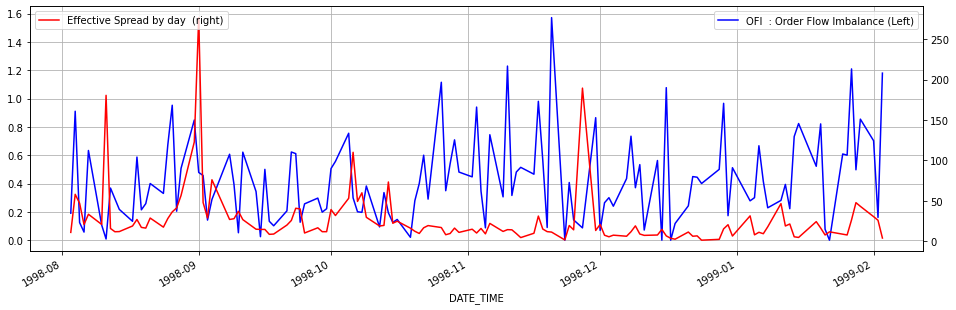

In [125]:
plt.figure(figsize=(16,5))
plt.xlabel('PFizer Times Series')

ax1 = BIT_SIT['OFI'].plot(color='blue', grid=True, label='OFI  : Order Flow Imbalance (Left)')
ax2 = BIT_SIT['Eff_Spread'].plot(color='red', grid=True, secondary_y=True, label='Effective Spread by day ')

ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()